# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

fatal: destination path 'tensorflow' already exists and is not an empty directory.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [ ]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

# Importar Tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [ ]:
session = tf.Session()

# Bag of Words para Spam/Ham

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import string
import requests
import io
from zipfile import ZipFile
from tensorflow.contrib import learn

In [ ]:
save_file_name = os.path.join('..','..','datasets', '/content/tensorflow/datasets/spam_data.csv')
if os.path.isfile(save_file_name):
    #el fichero existe y solo hay que cargarlo
    text_data = []
    with open(save_file_name, 'r') as temp_output_file:
        reader = csv.reader(temp_output_file)
        for row in reader:
            text_data.append(row)
else: 
    ##el fichero no existe y debemos descargarlo
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
    req = requests.get(url)
    z = ZipFile(io.BytesIO(req.content))
    file = z.read('SMSSpamCollection')
    ##Transformar el fichero binario a texto
    text_data = file.decode()
    text_data = text_data.encode('ascii', errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    ##Guardar datos en CSV
    with open(save_file_name, 'w') as temp_output_file:
        writer = csv.writer(temp_output_file)
        writer.writerows(text_data)

In [ ]:
text_data

[['ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['ham', 'Ok lar... Joking wif u oni...'],
 ['spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['ham', 'U dun say so early hor... U c already then say...'],
 ['ham', "Nah I don't think he goes to usf, he lives around here though"],
 ['spam',
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 1.50 to rcv"],
 ['ham',
  'Even my brother is not like to speak with me. They treat me like aids patent.'],
 ['ham',
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"],
 ['spam',
  'WINNER!! As a valued network customer you have been selected to receivea 90

In [ ]:
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]
target = [1 if x == 'spam' else 0 for x in target]

In [ ]:
texts

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea 900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your 

In [ ]:
target

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Pre procesado del texto

In [ ]:
texts = [x.lower() for x in texts] # Convertir los textos a minúscula
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts] # Eliminamos signos de puntuación
texts = [''.join(c for c in x if c not in '0123456789') for x in texts] # Eliminamos los números
texts = [' '.join(x.split()) for x in texts] # Eliminar espacios en blanco y separadores extras

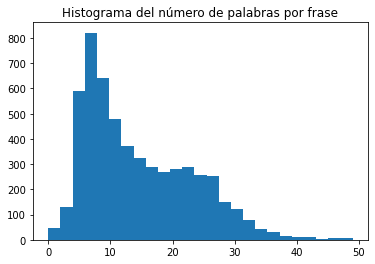

In [ ]:
texts_lengths = [len(x.split()) for x in texts]
texts_lengths = [x for x in texts_lengths if x < 50]
plt.hist(texts_lengths, bins=25)
plt.title("Histograma del número de palabras por frase")
plt.show()

In [ ]:
sentence_size = 40
min_word_freq = 3

In [ ]:
vocab_processor = learn.preprocessing.VocabularyProcessor(sentence_size, min_frequency=min_word_freq)
vocab_processor.fit_transform(texts)
transformed_texts = np.array([x for x in vocab_processor.transform(texts)])
embedding_size = len(np.unique(transformed_texts))

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [ ]:
embedding_size

2108

In [ ]:
transformed_texts

array([[  44,  455,    0, ...,    0,    0,    0],
       [  47,  315, 1440, ...,    0,    0,    0],
       [  46,  465,    9, ...,    0,    0,    0],
       ...,
       [   0,   59,    9, ...,    0,    0,    0],
       [   5,  493,  108, ...,    0,    0,    0],
       [   0,   40,  474, ...,    0,    0,    0]])

In [ ]:
texts

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only',
 'had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call the mobil

In [ ]:
train_idx = np.random.choice(len(texts), round(len(texts)*0.8), replace=False)
test_idx = np.array(list(set(range(len(texts)))-set(train_idx)))

texts_train = [x for ix, x in enumerate(texts) if ix in train_idx]
texts_test = [x for ix, x in enumerate(texts) if ix in test_idx]
target_train = [x for ix, x in enumerate(target) if ix in train_idx ]
target_test = [x for ix, x in enumerate(target) if ix in test_idx]

In [ ]:
identity_matrix = tf.diag(tf.ones(shape = [embedding_size]))

In [ ]:
A = tf.Variable(tf.random_normal(shape=[embedding_size,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [ ]:
x_data = tf.placeholder(shape=[sentence_size], dtype=tf.int32)
y_target = tf.placeholder(shape = [1,1], dtype = tf.float32)

In [ ]:
x_embed = tf.nn.embedding_lookup(identity_matrix, x_data)
x_col_sums = tf.reduce_sum(x_embed,0)

In [ ]:
x_col_sum_2D = tf.expand_dims(x_col_sums,0)
model_output = tf.add(tf.matmul(x_col_sum_2D, A), b)

In [ ]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [ ]:
prediction = tf.sigmoid(model_output)

In [ ]:
my_optim = tf.train.GradientDescentOptimizer(0.001)
train_step = my_optim.minimize(loss)

In [ ]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [ ]:
loss_vect = []
train_acc_all = []
train_acc_avg = []
for ix, t in enumerate(vocab_processor.fit_transform(texts_train)):
    y_data = [[target_train[ix]]]
    session.run(train_step, feed_dict={x_data:t, y_target:y_data})
    
    temp_loss = session.run(loss, feed_dict={x_data:t, y_target:y_data})
    loss_vect.append(temp_loss)
    
    if(ix+1)%10==0:
        print("Observación de entrenamiento #{}, Perdidas = {}".format(ix+1, temp_loss))
    
    [[temp_pred]] = session.run(prediction, feed_dict={x_data:t, y_target:y_data})
    train_acc_temp = target_train[ix]==np.round(temp_pred)
    train_acc_all.append(train_acc_temp)
    if len(train_acc_all)>=50:
        train_acc_avg.append(np.mean(train_acc_all[-50:]))
        train_acc_all = []

Observación de entrenamiento #10, Perdidas = 3.0783834148451206e-08
Observación de entrenamiento #20, Perdidas = 9.568512916564941
Observación de entrenamiento #30, Perdidas = 3.877009391784668
Observación de entrenamiento #40, Perdidas = 5.251784324645996
Observación de entrenamiento #50, Perdidas = 0.14768503606319427
Observación de entrenamiento #60, Perdidas = 0.1644166111946106
Observación de entrenamiento #70, Perdidas = 0.0016924116062000394
Observación de entrenamiento #80, Perdidas = 7.117312908172607
Observación de entrenamiento #90, Perdidas = 0.0032256077975034714
Observación de entrenamiento #100, Perdidas = 0.05287296697497368
Observación de entrenamiento #110, Perdidas = 4.195242881774902
Observación de entrenamiento #120, Perdidas = 0.10789552330970764
Observación de entrenamiento #130, Perdidas = 0.004917551763355732
Observación de entrenamiento #140, Perdidas = 2.388273239135742
Observación de entrenamiento #150, Perdidas = 0.01825125515460968
Observación de entrenami

In [ ]:
train_acc_all

[True, True, True, True, True, True, True, False, True]

(0.0, 1.0)

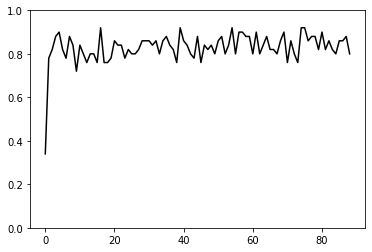

In [ ]:
plt.plot(train_acc_avg, 'k-', label='Precisión')
plt.ylim([0,1])

In [ ]:
test_acc_all = []
test_acc_avg = []
for ix, t in enumerate(vocab_processor.fit_transform(texts_test)):
    y_data = [[target_test[ix]]]
    
  
    
    [[temp_pred]] = session.run(prediction, feed_dict={x_data:t, y_target:y_data})
    test_acc_temp = target_test[ix]==np.round(temp_pred)
    test_acc_all.append(test_acc_temp)
    if len(test_acc_all)>=50:
        test_acc_avg.append(np.mean(test_acc_all[-50:]))
        test_acc_all = []
    
    if(ix+1)%50==0:
        print("Observación de entrenamiento #{}".format(ix+1))
        print("Frase: {}".format(t))
        print("Es {} y la predicción dice: {}".format(y_data, temp_pred))

Observación de entrenamiento #50
Frase: [981  56  19 263   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
Es [[0]] y la predicción dice: 0.012642900459468365
Observación de entrenamiento #100
Frase: [  93    2  228  150  522  832   25   29  305   87 1060  438    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Es [[0]] y la predicción dice: 0.21119749546051025
Observación de entrenamiento #150
Frase: [  42   97   23   14 1522  203   54    0  821  298   15    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Es [[0]] y la predicción dice: 0.0004469917039386928
Observación de entrenamiento #200
Frase: [   3   20  309    4 1495 1034  326   16   45  343  525  821  273  535
  739  235    0  696    0  278  163  1

In [ ]:
print("Eficacia de predicción globale en test {}".format(np.mean(test_acc_all)))

Eficacia de predicción globale en test 0.8


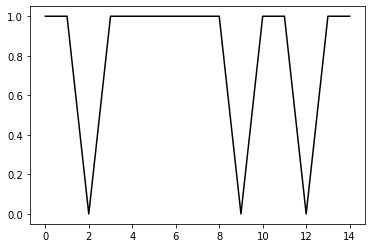

In [ ]:
plt.plot(test_acc_all, 'k-', label = "Eficacia en la predicción")